# Loading Data

In [2]:
!pip install gdown


In [3]:
#imports 
import os
import gdown
import json
import numpy as np

In [4]:

# load the dataset from Google Drive
files = {
    "user_history.json": "https://drive.google.com/uc?id=1ASkuUtuj0XCyCl5C1Ru1Hbpynm0WoPmS",
    "user_instructions.json": "https://drive.google.com/uc?id=1VQ_nvxSb5DKTs-lXbjj7_xyDUVcGmRtl",
    "user_profiles.json": "https://drive.google.com/uc?id=1EcQUoLCvZi_mB5pVy0ov3ym9PwzVLjSi",
    "all_products.json": "https://drive.google.com/uc?id=1Vg8zCKAYgHXfTvZuxeMMkpe118622vp3"
}

# Download each file
for filename, url in files.items():
    print(f"Downloading {filename}...")
    gdown.download(url, output=filename, quiet=False)
print("Download complete.")


Downloading...
From (original): https://drive.google.com/uc?id=1ASkuUtuj0XCyCl5C1Ru1Hbpynm0WoPmS
From (redirected): https://drive.google.com/uc?id=1ASkuUtuj0XCyCl5C1Ru1Hbpynm0WoPmS&confirm=t&uuid=2053c44b-3944-4d98-af92-afcb66a6b321
To: /Users/kaur13./Downloads/ProPer-Proactive-and-Personalized-Agents/data/PersonalWAB/user_history.json
100%|██████████| 114M/114M [00:02<00:00, 41.3MB/s] 


Downloading...
From: https://drive.google.com/uc?id=1VQ_nvxSb5DKTs-lXbjj7_xyDUVcGmRtl
To: /Users/kaur13./Downloads/ProPer-Proactive-and-Personalized-Agents/data/PersonalWAB/user_instructions.json
100%|██████████| 30.0M/30.0M [00:00<00:00, 34.2MB/s]


Downloading...
From: https://drive.google.com/uc?id=1EcQUoLCvZi_mB5pVy0ov3ym9PwzVLjSi
To: /Users/kaur13./Downloads/ProPer-Proactive-and-Personalized-Agents/data/PersonalWAB/user_profiles.json
100%|██████████| 824k/824k [00:00<00:00, 7.10MB/s]


Downloading...
From: https://drive.google.com/uc?id=1Vg8zCKAYgHXfTvZuxeMMkpe118622vp3
To: /Users/kaur13./Downloads/ProPer-Proactive-and-Personalized-Agents/data/PersonalWAB/all_products.json
100%|██████████| 70.1M/70.1M [00:01<00:00, 43.5MB/s]

Download complete.


# Analyzing Data

### -- User History -- ###

In [5]:
#no. of unique users in user_history

with open("user_history.json", "r") as f:
    user_history_data = json.load(f)
unique_users = set()
for user_id in user_history_data.keys():
    unique_users.add(user_id)
print(f"Number of unique users in user_history.json: {len(unique_users)}")

Number of unique users in user_history.json: 1000


In [6]:
print(user_history_data["AGMQSZEQFFKH33FJQZLN7MF5QX2Q"])

[{'product_info': {'main_category': 'Health_and_Household', 'title': 'Spoonk Acupressure Eco Mat, Pagoda Blue - with Massage Ball, Travel Mat & Sling Bag - Back & Neck Massager - Travel Pillow - Stress & Muscle Relief - Sleep Aid - Relaxation Kit - Made with Cotton', 'average_rating': 4.3, 'rating_number': 2974, 'features': ['The Original Spiked Relaxation Mat; Spoonk Mats work on the simple principle of acupressure; Over 6000 stimulation points help with stress relief; Combo includes regular mat with sling-style carrying bag, travel mat, and groove ball', 'Stress, Muscle Tension And Pain Relief; High quality stimulation points increase circulation; A great sleep aid and massager for stiff muscles; Make it part of your go-to relaxation kit for back and neck pain; Rejuvenate and rebalance the whole body', 'Achieve Deep Relaxation; Use your Spoonk Mat to calm down before bed, help you wake up in the morning, soothe muscles after a workout; Travel Mat rolls up for easy head, neck, and bac

### -- User Instructions -- ###

In [7]:
#concatenate train and test data in user_instructions where both train and test are keys 
with open("user_instructions.json", "r") as f:
    user_instructions_data = json.load(f)
train_data = user_instructions_data["train"]
test_data = user_instructions_data["test"]
combined_data = train_data + test_data
print(f"Number of entries in combined user_instructions data: {len(combined_data)}")


Number of entries in combined user_instructions data: 9070


In [8]:
# no. of "task" keys in combined data
total_instructions = 0
for entry in combined_data:
    if "task" in entry:
        total_instructions += 1
print(f"Number of 'task' keys in combined data: {total_instructions}")

Number of 'task' keys in combined data: 9070


In [9]:
print(user_instructions_data["train"][0])

{'user_id': 'AGG72WL34NYISSHBB2DWT64GQYVQ', 'task': "Hey there! I'm super excited to find some high-quality replacement parts for my robotic vacuum cleaner. Looking for a reputable brand with great filters and brushes that'll keep my floors sparkling clean. Any awesome recommendations around $20?", 'target': {'product_info': {'main_category': 'Home_and_Kitchen', 'title': 'Electropan Replacement Vacuum Filter Brush Kit for Robotic Vacuum ILIFE V3, V3s, V3s pro, V5, V5s, V5s pro ILIFE Robot Vacuum Replacement Parts Ilife Vacuum Filters V3s', 'average_rating': 4.3, 'rating_number': 2534, 'features': ['Vaccum Parts works with Ilife V3, Ilife V3s pro, Ilife V5, Ilife V5s, Ilife V5s Pro Robotic Vacuum Cleaner. Good quality ilife v3s pro Robotic Vacuum Replacement Parts', 'Robot Parts Cleaner Accessory kit can keep your vacuum cleaner at peak performance, Suggest to replace ILIFE Vacuum Filters & Robot Vacuum Brush Replacement every 2-3 months', 'Vacuum Cleaner Parts/ robot Vacuum Accessories

### -- All Products -- 


In [10]:
# number of unique products in all_products where each key is a product id
with open("all_products.json", "r") as f:
    all_products_data = json.load(f)
unique_products = set()
for product_id in all_products_data.keys():
    unique_products.add(product_id)
print(f"Number of unique products in all_products.json: {len(unique_products)}")

Number of unique products in all_products.json: 35772


In [11]:
print(all_products_data["B07BYJ3389"])

{'main_category': 'Health_and_Household', 'title': 'Spoonk Acupressure Eco Mat, Pagoda Blue - with Massage Ball, Travel Mat & Sling Bag - Back & Neck Massager - Travel Pillow - Stress & Muscle Relief - Sleep Aid - Relaxation Kit - Made with Cotton', 'average_rating': 4.3, 'rating_number': 2974, 'features': ['The Original Spiked Relaxation Mat; Spoonk Mats work on the simple principle of acupressure; Over 6000 stimulation points help with stress relief; Combo includes regular mat with sling-style carrying bag, travel mat, and groove ball', 'Stress, Muscle Tension And Pain Relief; High quality stimulation points increase circulation; A great sleep aid and massager for stiff muscles; Make it part of your go-to relaxation kit for back and neck pain; Rejuvenate and rebalance the whole body', 'Achieve Deep Relaxation; Use your Spoonk Mat to calm down before bed, help you wake up in the morning, soothe muscles after a workout; Travel Mat rolls up for easy head, neck, and back massage;\xa0Use 

In [12]:
# print number of unique categories as "main_category" in all_products
unique_categories = set()
for product in all_products_data.values():
    if "main_category" in product:
        unique_categories.add(product["main_category"])
print(f"Number of unique categories in all_products.json: {len(unique_categories)}")
print(unique_categories)

#print number of entries corresponding to each category
category_counts = {}
for product in all_products_data.values():
    if "main_category" in product:
        category = product["main_category"]
        if category in category_counts:
            category_counts[category] += 1
        else:
            category_counts[category] = 1
print("Number of entries corresponding to each category:")
for category, count in category_counts.items():
    print(f"{category}: {count}")

Number of unique categories in all_products.json: 5
{'Grocery_and_Gourmet_Food', 'Home_and_Kitchen', 'Electronics', 'Clothing_Shoes_and_Jewelry', 'Health_and_Household'}
Number of entries corresponding to each category:
Health_and_Household: 5051
Clothing_Shoes_and_Jewelry: 10024
Grocery_and_Gourmet_Food: 3431
Electronics: 5807
Home_and_Kitchen: 11459


### -- User Profiles --

In [13]:
# no. of unique users in user_profiles
with open("user_profiles.json", "r") as f:
    user_profiles_data = json.load(f)
unique_users_profiles = set()
for user_id in user_profiles_data.keys():
    unique_users_profiles.add(user_id)
print(f"Number of unique users in user_profiles.json: {len(unique_users_profiles)}")

Number of unique users in user_profiles.json: 1000


In [14]:
# Extract "Age" values into a list
age_list = [entry["user_profile"]["Age"] for entry in user_profiles_data.values()]

#print frequency of each age
age_array = np.array(age_list)
# Get the unique ages and their counts
unique_ages, counts = np.unique(age_array, return_counts=True)
# Create a dictionary with ages and their frequencies
age_frequency = dict(zip(unique_ages, counts))
# Print the age frequency dictionary
print(age_frequency)

{'18-24': 5, '25-34': 474, '35-44': 466, '45-49': 16, '50-55': 2, '56+': 37}


In [15]:
# Extract "Age" values into a list
gender_list = [entry["user_profile"]["Gender"] for entry in user_profiles_data.values()]

#print the gender frequency
gender_array = np.array(gender_list)
# Get the unique ages and their counts
unique_genders, counts = np.unique(gender_array, return_counts=True)
# Create a dictionary with ages and their frequencies
gender_frequency = dict(zip(unique_genders, counts))
# Print the age frequency dictionary
print(gender_frequency)

{'Female': 836, 'Male': 164}


/var/folders/r3/g0d4xwhj3dn_33frmt5hkpvc0000gn/T/ipykernel_16575/1612440713.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(occupation_counts.keys()), y=list(occupation_counts.values()), palette="viridis")


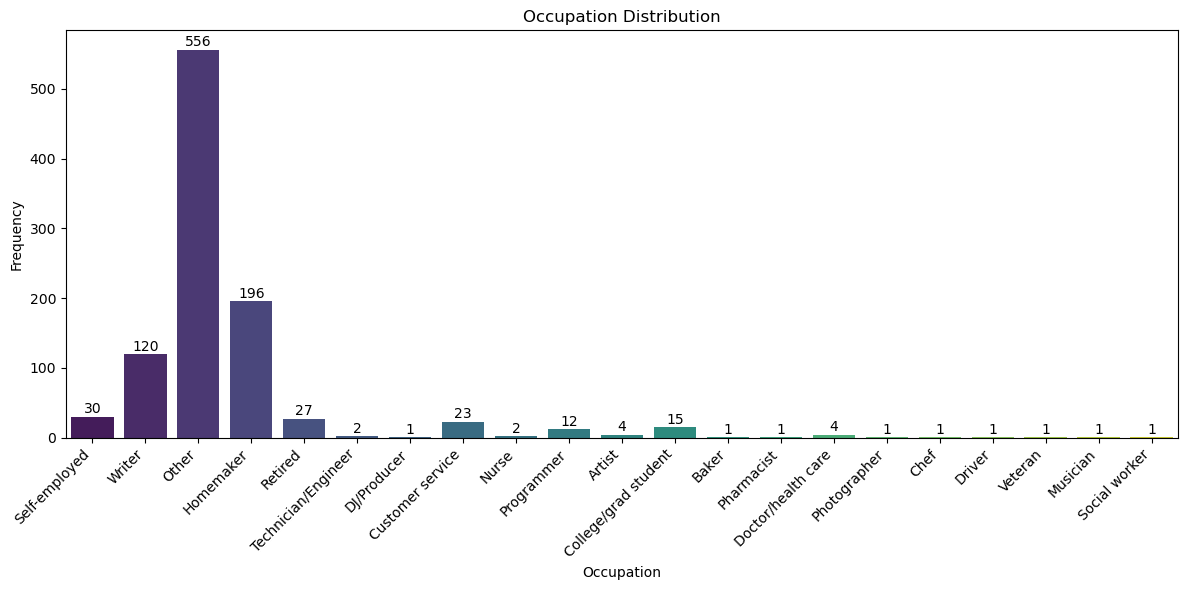

In [16]:
# Extract "Age" values into a list
occupation_list = [entry["user_profile"]["Occupation"] for entry in user_profiles_data.values()]

#plot the age distribution
import matplotlib.pyplot as plt
import seaborn as sns
# Count the frequency of each occupation
from collections import Counter
occupation_counts = Counter(occupation_list)

# Plot the occupation distribution as a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(occupation_counts.keys()), y=list(occupation_counts.values()), palette="viridis")

# Add title and labels
plt.title('Occupation Distribution')
plt.xlabel('Occupation')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Annotate the bars with frequency counts
for i, count in enumerate(occupation_counts.values()):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [17]:
# create a new dictionary named user_profiles_refined
user_profiles_refined = {}
# Iterate through the user_profiles_data dictionary and if user occuptaion is not "Other" add to new dict
for user_id, entry in user_profiles_data.items():
    if entry["user_profile"]["Occupation"] != "Other":
        user_profiles_refined[user_id] = entry
    else:
        print(f"User ID {user_id} has occupation {entry["user_profile"]["Occupation"]}, skipping this entry.")
        continue


User ID AHFF6NAV7RRBWXD6KEUHRFHLSTZQ has occupation Other, skipping this entry.
User ID AHUXNQOGWFREKIOT7MJ3EE56P5CQ has occupation Other, skipping this entry.
User ID AGXVG6SP63T5U3Y5P7KPWGEOKYHA has occupation Other, skipping this entry.
User ID AHP2YRBTXEORUMB7VT6TX2Y7MBKQ has occupation Other, skipping this entry.
User ID AEWLRNNHCQS4QNDBRWSNZLMKSOAA has occupation Other, skipping this entry.
User ID AHVB43WAT5MDJ2ACBB76MISOMGNA has occupation Other, skipping this entry.
User ID AFC5TC5TXCZBX2ZBCIA4QZXF7BTQ has occupation Other, skipping this entry.
User ID AFPMDUMSK5ZTHXZYI4H4F7J2WUFA has occupation Other, skipping this entry.
User ID AGWQ2JWBFE22UOHIGVMXLICCTY7A has occupation Other, skipping this entry.
User ID AHQADKTAWCEJF6LDXXMARQWKEABA has occupation Other, skipping this entry.
User ID AEWHDC6MIZ5VNEBFJAV4E4DV7SCA has occupation Other, skipping this entry.
User ID AFTBY2CLFVAFPFWSZDDWMSIWKNWA has occupation Other, skipping this entry.
User ID AGYBHKIUAI5QUPRSU7L6CY5MIC3A has

In [18]:
#find number of unique users in user_profiles_refined
unique_users_refined = set()
for user_id in user_profiles_refined.keys():
    unique_users_refined.add(user_id)
print(f"Number of unique users in user_profiles_refined.json: {len(unique_users_refined)}")

Number of unique users in user_profiles_refined.json: 444


In [19]:
#print number of males and females in new unique_users_refined

# Extract "Age" values into a list
gender_list = [entry["user_profile"]["Gender"] for entry in user_profiles_refined.values()]

#print the gender frequency
gender_array = np.array(gender_list)
# Get the unique ages and their counts
unique_genders, counts = np.unique(gender_array, return_counts=True)
# Create a dictionary with ages and their frequencies
gender_frequency = dict(zip(unique_genders, counts))
# Print the age frequency dictionary
print(gender_frequency)

#in user_profiles_refined, keep only 60 males AND 60 females and delete rest
# Create a new dictionary to store the refined data
user_profiles_refined_final = {}
# Create separate lists for males and females
males = []
females = []

# Separate the entries by gender
for user_id, entry in user_profiles_refined.items():
    if entry["user_profile"]["Gender"] == "Male":
        males.append((user_id, entry))
    elif entry["user_profile"]["Gender"] == "Female":
        females.append((user_id, entry))

# Keep only the first 60 males and 60 females
selected_males = males[:60]
selected_females = females[:60]

# Combine the selected males and females into the final dictionary
user_profiles_refined_final = {user_id: entry for user_id, entry in selected_males + selected_females}

# Print the counts of males and females in the final refined data
print(f"Number of males in refined data: {len([entry for entry in user_profiles_refined_final.values() if entry['user_profile']['Gender'] == 'Male'])}")
print(f"Number of females in refined data: {len([entry for entry in user_profiles_refined_final.values() if entry['user_profile']['Gender'] == 'Female'])}")



{'Female': 377, 'Male': 67}
Number of males in refined data: 60
Number of females in refined data: 60


In [20]:
# Extract "Age" values into a list
age_list = [entry["user_profile"]["Age"] for entry in user_profiles_refined_final.values()]

#print frequency of each age
age_array = np.array(age_list)
# Get the unique ages and their counts
unique_ages, counts = np.unique(age_array, return_counts=True)
# Create a dictionary with ages and their frequencies
age_frequency = dict(zip(unique_ages, counts))
# Print the age frequency dictionary
print(age_frequency)

{'25-34': 36, '35-44': 72, '45-49': 4, '56+': 8}


In [21]:
#strore the refined data in a new json file
with open("user_profiles_refined_final.json", "w") as f:
    json.dump(user_profiles_refined_final, f, indent=4)